<a href="https://colab.research.google.com/github/YuvrajRakheja/Sparks-Foundation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Spark Foundation (GRIP) June 2022 Internship Project

# Data Science and Business Analytics

##Author - Yuvraj Rakheja





#TASK 1: Prediction Using Supervised ML

In this task, we need to predict the percentage of a student based on the number of study hours. This task contains two variables i.e., 'format' is the number of hours studies and the 'percentage' is the percentage score of a student.This can be done using simple regression.



Technical Stack : Sikit Learn , Numpy Array , Pandas , Matplotlib


In [40]:
#import all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px

Data can be accessed and read from the given URL: http://bit.ly/w-data



In [41]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data import successful")


Data import successful


In [42]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
# checking for null values
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [44]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
# Checking data correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


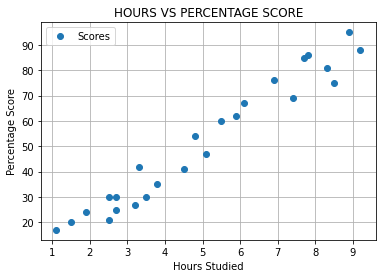

In [47]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style ='o')  
plt.title('HOURS VS PERCENTAGE SCORE')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

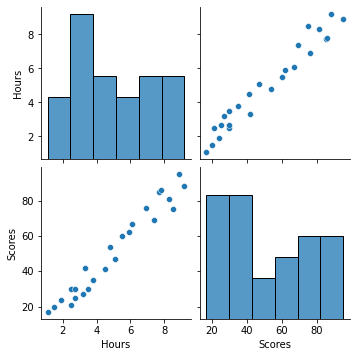

In [48]:
sns.pairplot(data)

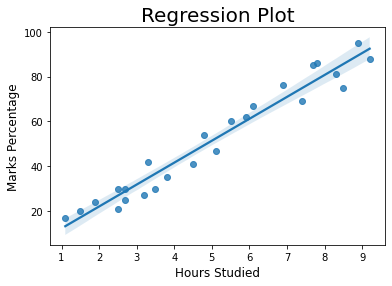

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [49]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [50]:
hours=data['Hours']
scores=data['Scores']

In [51]:
px.histogram(x=hours,y=scores)

In [52]:
px.line(x=hours,y=scores)

Training the model

In [53]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42)

In [54]:
print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


In [55]:
print(y_train.shape, y_test.shape)

(17,) (8,)


In [56]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression() 
model.fit(X_train, y_train)
print("Model Trained")

Model Trained


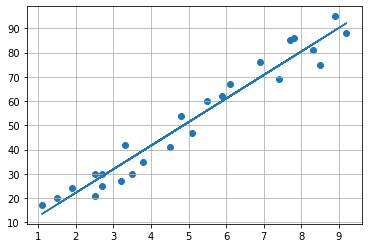

In [57]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.grid()
plt.show()

In [58]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]]
[83.39168645 27.07054902 27.07054902 69.79692914 60.0863882  29.0126572
 34.83898177 52.31795545]


#Predictions from our Model

In [59]:
#Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


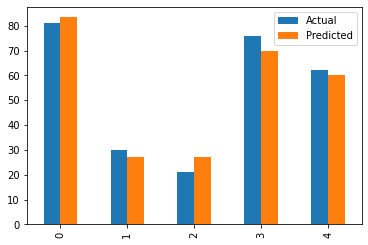

In [60]:
# Plot bar graph for predictive data
data_plot = pred_data.head()
data_plot.plot(kind = "bar")

In [61]:
print(f'THE TRAIN SCORE; {model.score(X_train,y_train)}')
print(f'THE TEST SCORE; {model.score(X_train,y_train)}')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'MEAN ABSOLUTE ERROR :' ,mean_absolute_error(y_test,y_pred))
print(f'MEAN SQUARED ERROR :' ,mean_squared_error(y_test,y_pred))

THE TRAIN SCORE; 0.9536486503889446
THE TEST SCORE; 0.9536486503889446
MEAN ABSOLUTE ERROR : 4.499999999999998
MEAN SQUARED ERROR : 23.61945761415174


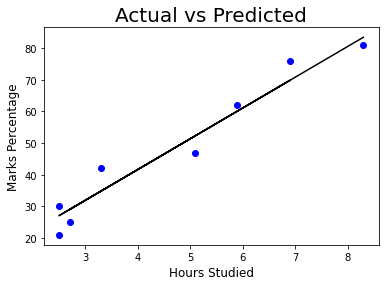

In [62]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [63]:
# Test with your own data
hours = [[9.25]]
pred = model.predict(hours)
print("No of Hours : {}".format(hours))
print("Predicted Score : {}".format(pred))

No of Hours : [[9.25]]
Predicted Score : [92.61670034]
